In [1]:
from comp300.App.Utils import *
from baselines.common.vec_env import VecFrameStack
from comp300.LearningModel.AgentClasses import *
from baselines.common.cmd_util import make_vec_env
import matplotlib.pyplot as plt

/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/patrick/PycharmP

In [2]:
obsandvideo = DemoObsAndVideo(fileName="/home/patrick/Agent12Mtrain.mp4")

env_id = 'BreakoutNoFrameskip-v4'
env_type = 'atari'

env = make_vec_env(env_id, env_type, 1, 0,
                   wrapper_kwargs={
                       'clip_rewards': False,
                       'episode_life': False,
                   })
env = VecFrameStack(env, 4)

#load the reward network
trainedNetwork = RewardNetwork("", env=env, env_type=env_type)
trainedNetwork.load_state_dict(torch.load("/home/patrick/models/breakout-reward/fullTest.params"))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
trainedNetwork.to(device)

converting mp4 observations from /home/patrick/Agent12Mtrain.mp4
Logging to /tmp/openai-2020-04-14-14-45-33-619084



RewardNetwork(
  (conv1): Conv2d(4, 16, kernel_size=(7, 7), stride=(3, 3))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(2, 2))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [3]:
rewards = []
for obs in obsandvideo.obs:
    shapedObservation = torch.from_numpy(obs).float().to(device)
    reward, abs_reward = trainedNetwork.predict_reward(shapedObservation)
    learnedReward = reward.tolist()
    rewards.append(learnedReward)

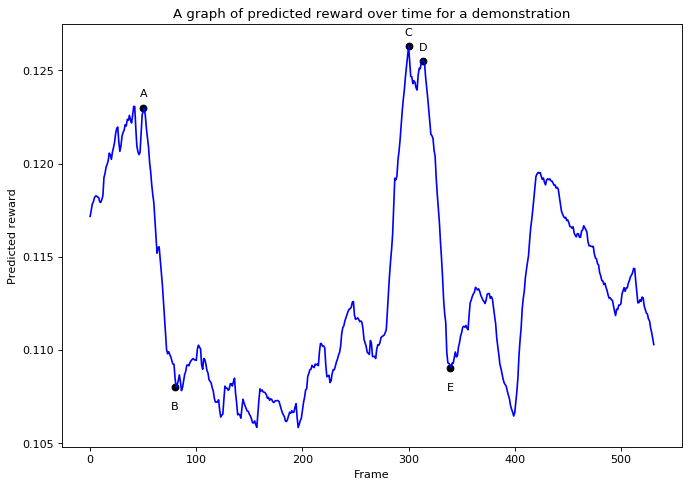

In [81]:
from matplotlib.pyplot import figure
from baselines.common.plot_util import smooth
smoothed_rewards = smooth(rewards, 10)
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(smoothed_rewards, c="b")
plt.scatter(50,0.123, c="black")
plt.annotate("A", (50,0.123),
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center')
plt.scatter(80,0.108, c="black")
plt.annotate("B", (80,0.108),
             textcoords="offset points", # how to position the text
             xytext=(0,-20), # distance from text to points (x,y)
             ha='center')
plt.scatter(300,0.1263, c="black")
plt.annotate("C", (300,0.1263),
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center')
plt.scatter(314,0.1255, c="black")
plt.annotate("D", (314,0.1255),
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center')
plt.scatter(339,0.109, c="black")
plt.annotate("E", (339,0.109),
             textcoords="offset points", # how to position the text
             xytext=(0,-20), # distance from text to points (x,y)
             ha='center')
#plt.plot(rewards)

plt.ylabel("Predicted reward")
plt.xlabel("Frame")
plt.title("A graph of predicted reward over time for a demonstration")
plt.show()

In [5]:
frames = []
ret = True
while ret:
    ret, newFrame = obsandvideo.get_frame()
    frames.append(newFrame)

(-0.5, 159.5, 209.5, -0.5)

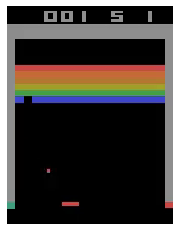

In [82]:
plt.imshow(frames[50])
plt.axis('off')

(-0.5, 159.5, 209.5, -0.5)

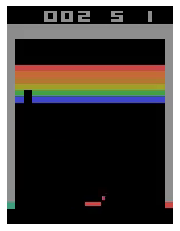

In [83]:
plt.imshow(frames[79])
plt.axis('off')

(-0.5, 159.5, 209.5, -0.5)

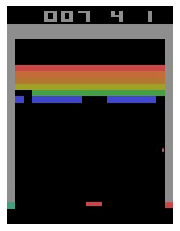

In [84]:
plt.imshow(frames[301])
plt.axis('off')

(-0.5, 159.5, 209.5, -0.5)

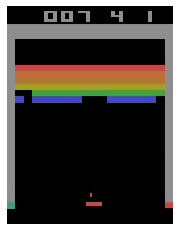

In [86]:
plt.imshow(frames[314])
plt.axis('off')

(-0.5, 159.5, 209.5, -0.5)

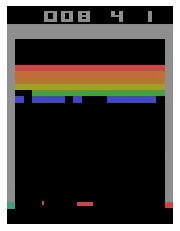

In [85]:
plt.imshow(frames[337])
plt.axis('off')